In [48]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy.stats import uniform


In [2]:
# Load the CSV file

data = pd.read_csv('hotel_booking.csv')



In [3]:
data.shape

(119390, 36)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.head

<bound method NDFrame.head of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

In [7]:
# Step 1: Handle Missing Values
data['children'].fillna(0, inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

In [8]:
# Check for any remaining missing values
print("Remaining missing values after imputation:")
print(data.isnull().sum())

Remaining missing values after imputation:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type        

In [9]:
# Check the number of duplicate rows
print("Number of duplicate rows before removing duplicates:", data.duplicated().sum())



Number of duplicate rows before removing duplicates: 0


In [10]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


In [11]:

# Check the number of duplicate rows after removing duplicates
print("Number of duplicate rows after removing duplicates:", data.duplicated().sum())

Number of duplicate rows after removing duplicates: 0


In [13]:
# Drop irrelevant columns
data.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [14]:
# Convert categorical columns to 'category' type
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [15]:
# Create new features
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['family_size'] = data['adults'] + data['children'] + data['babies']

In [16]:
# Check the cleaned dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,family_size
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [18]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_hotel_booking.csv', index=False)

print("Cleaned dataset saved as 'cleaned_hotel_booking.csv'")

Cleaned dataset saved as 'cleaned_hotel_booking.csv'


In [24]:
#change the datatype to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [25]:
data.describe(include='object')


,arrival_date_month,reservation_status
count,119390,119390
unique,12,3
top,August,Check-Out
freq,13877,75166


In [26]:
#check the unique values
for col in data.describe(include='object').columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
reservation_status
['Check-Out' 'Canceled' 'No-Show']
--------------------------------------------------


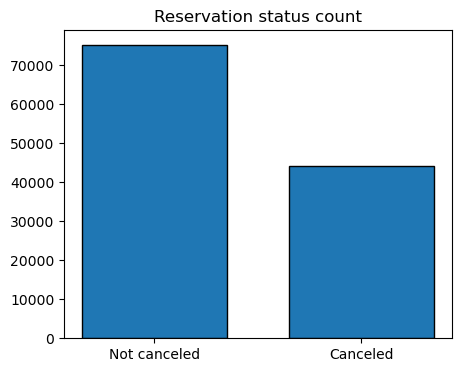

In [33]:
data['is_canceled'].value_counts()
cancelled_perce=data['is_canceled'].value_counts(normalize=True)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],data['is_canceled'].value_counts(),edgecolor='k',width=0.7)
plt.show()

In [37]:
# Convert 'is_canceled' to a string type
data['is_canceled'] = data['is_canceled'].astype(str)

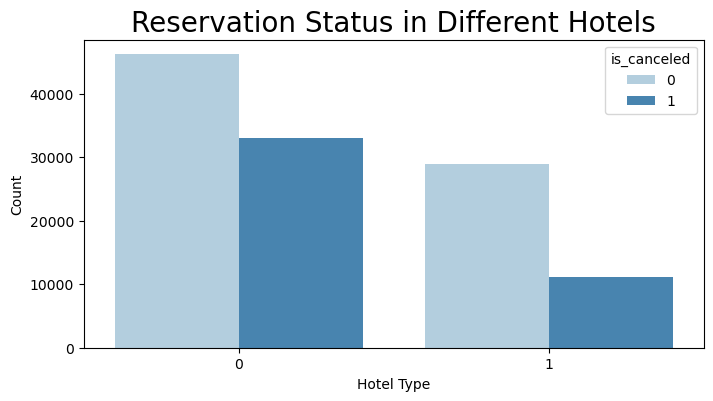

In [46]:
# Customize the legend
plt.figure(figsize = (8,4))
ax = sns.countplot(x = 'hotel', hue = 'is_canceled',data=data, palette= 'Blues')
legend_labels,_ = ax. get_legend_handles_labels()
# Add title and labels
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

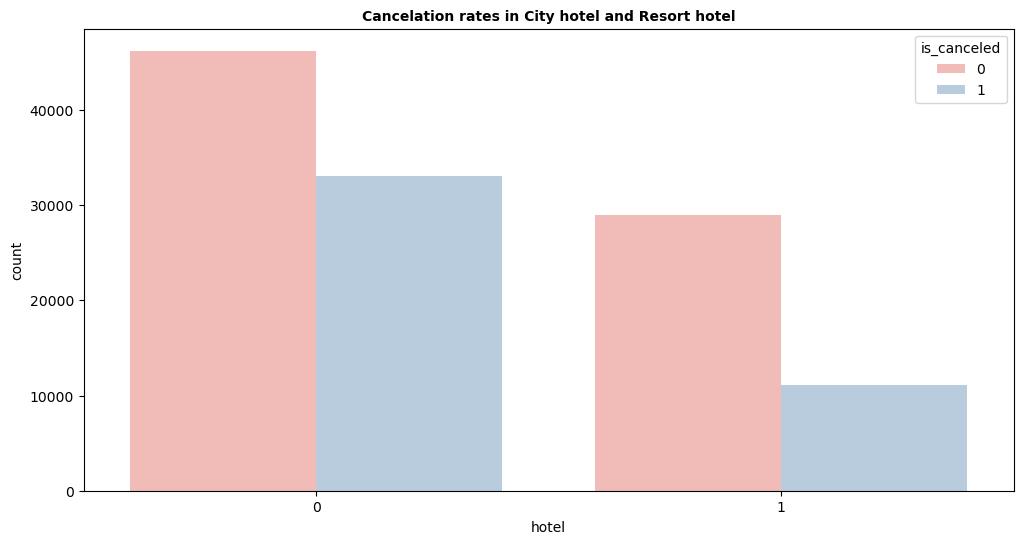

In [43]:
plt.figure(figsize=(12, 6))

sns.countplot(x='hotel',hue="is_canceled", data=data,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=10)
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (95512, 33) (95512,)
Testing set size: (23878, 33) (23878,)
